In [1]:
pip install opencv-python numpy

In [2]:
!pip install ultralytics -q

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

In [23]:
import os

In [5]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:03<00:00, 15.1MB/s]


In [8]:
predict = model.predict("R (1).jpg" , save = True , save_txt = True)


image 1/1 e:\binary_mask\YOLO\R (1).jpg: 384x640 1 person, 762.5ms
Speed: 0.0ms preprocess, 762.5ms inference, 16.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\shabn\runs\segment\predict
1 label saved to c:\Users\shabn\runs\segment\predict\labels


In [9]:
predict[0].masks.data[0].unique()

tensor([0., 1.])

In [10]:
predict[0].masks.data.shape
predict[0].masks.data[0].unique()

tensor([0., 1.])

In [11]:
H , W , _ = cv2.imread("R (1).jpg").shape

In [13]:
import matplotlib.pyplot as plt

In [22]:
m=(predict[0].masks.data[0].numpy() * 255).astype("uint8")
#m1=(predict[0].masks.data[1].numpy() * 255).astype("uint8")

In [25]:
# Create 'masks' directory if it does not exist
os.makedirs('masks', exist_ok=True)

# Save the mask image
mask_path = os.path.join('masks', 'mask0.jpg')
cv2.imwrite(mask_path, m)

print(f"Mask saved at: {mask_path}")

Mask saved at: masks\mask0.jpg


In [17]:
len(predict)

1

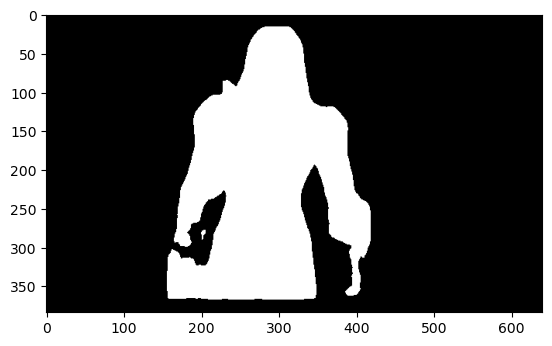

In [16]:
plt.imshow(m, cmap='gray')

In [12]:
#cv2_imshow((predict[0].masks.data[0].numpy() * 255).astype("uint8"))

NameError: name 'cv2_imshow' is not defined

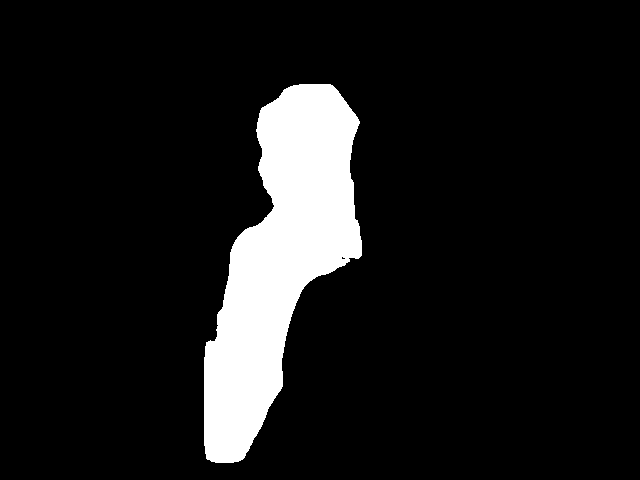

In [ ]:
cv2_imshow((predict[0].masks.data[1].numpy() * 255).astype("uint8"))

In [21]:
x = (predict[0].masks.xy[0][: , 0].astype('int'))
y = (predict[0].masks.xy[0][: , 1].astype('int'))

In [ ]:
blk = np.zeros((H , W))
blk[y , x] = 255

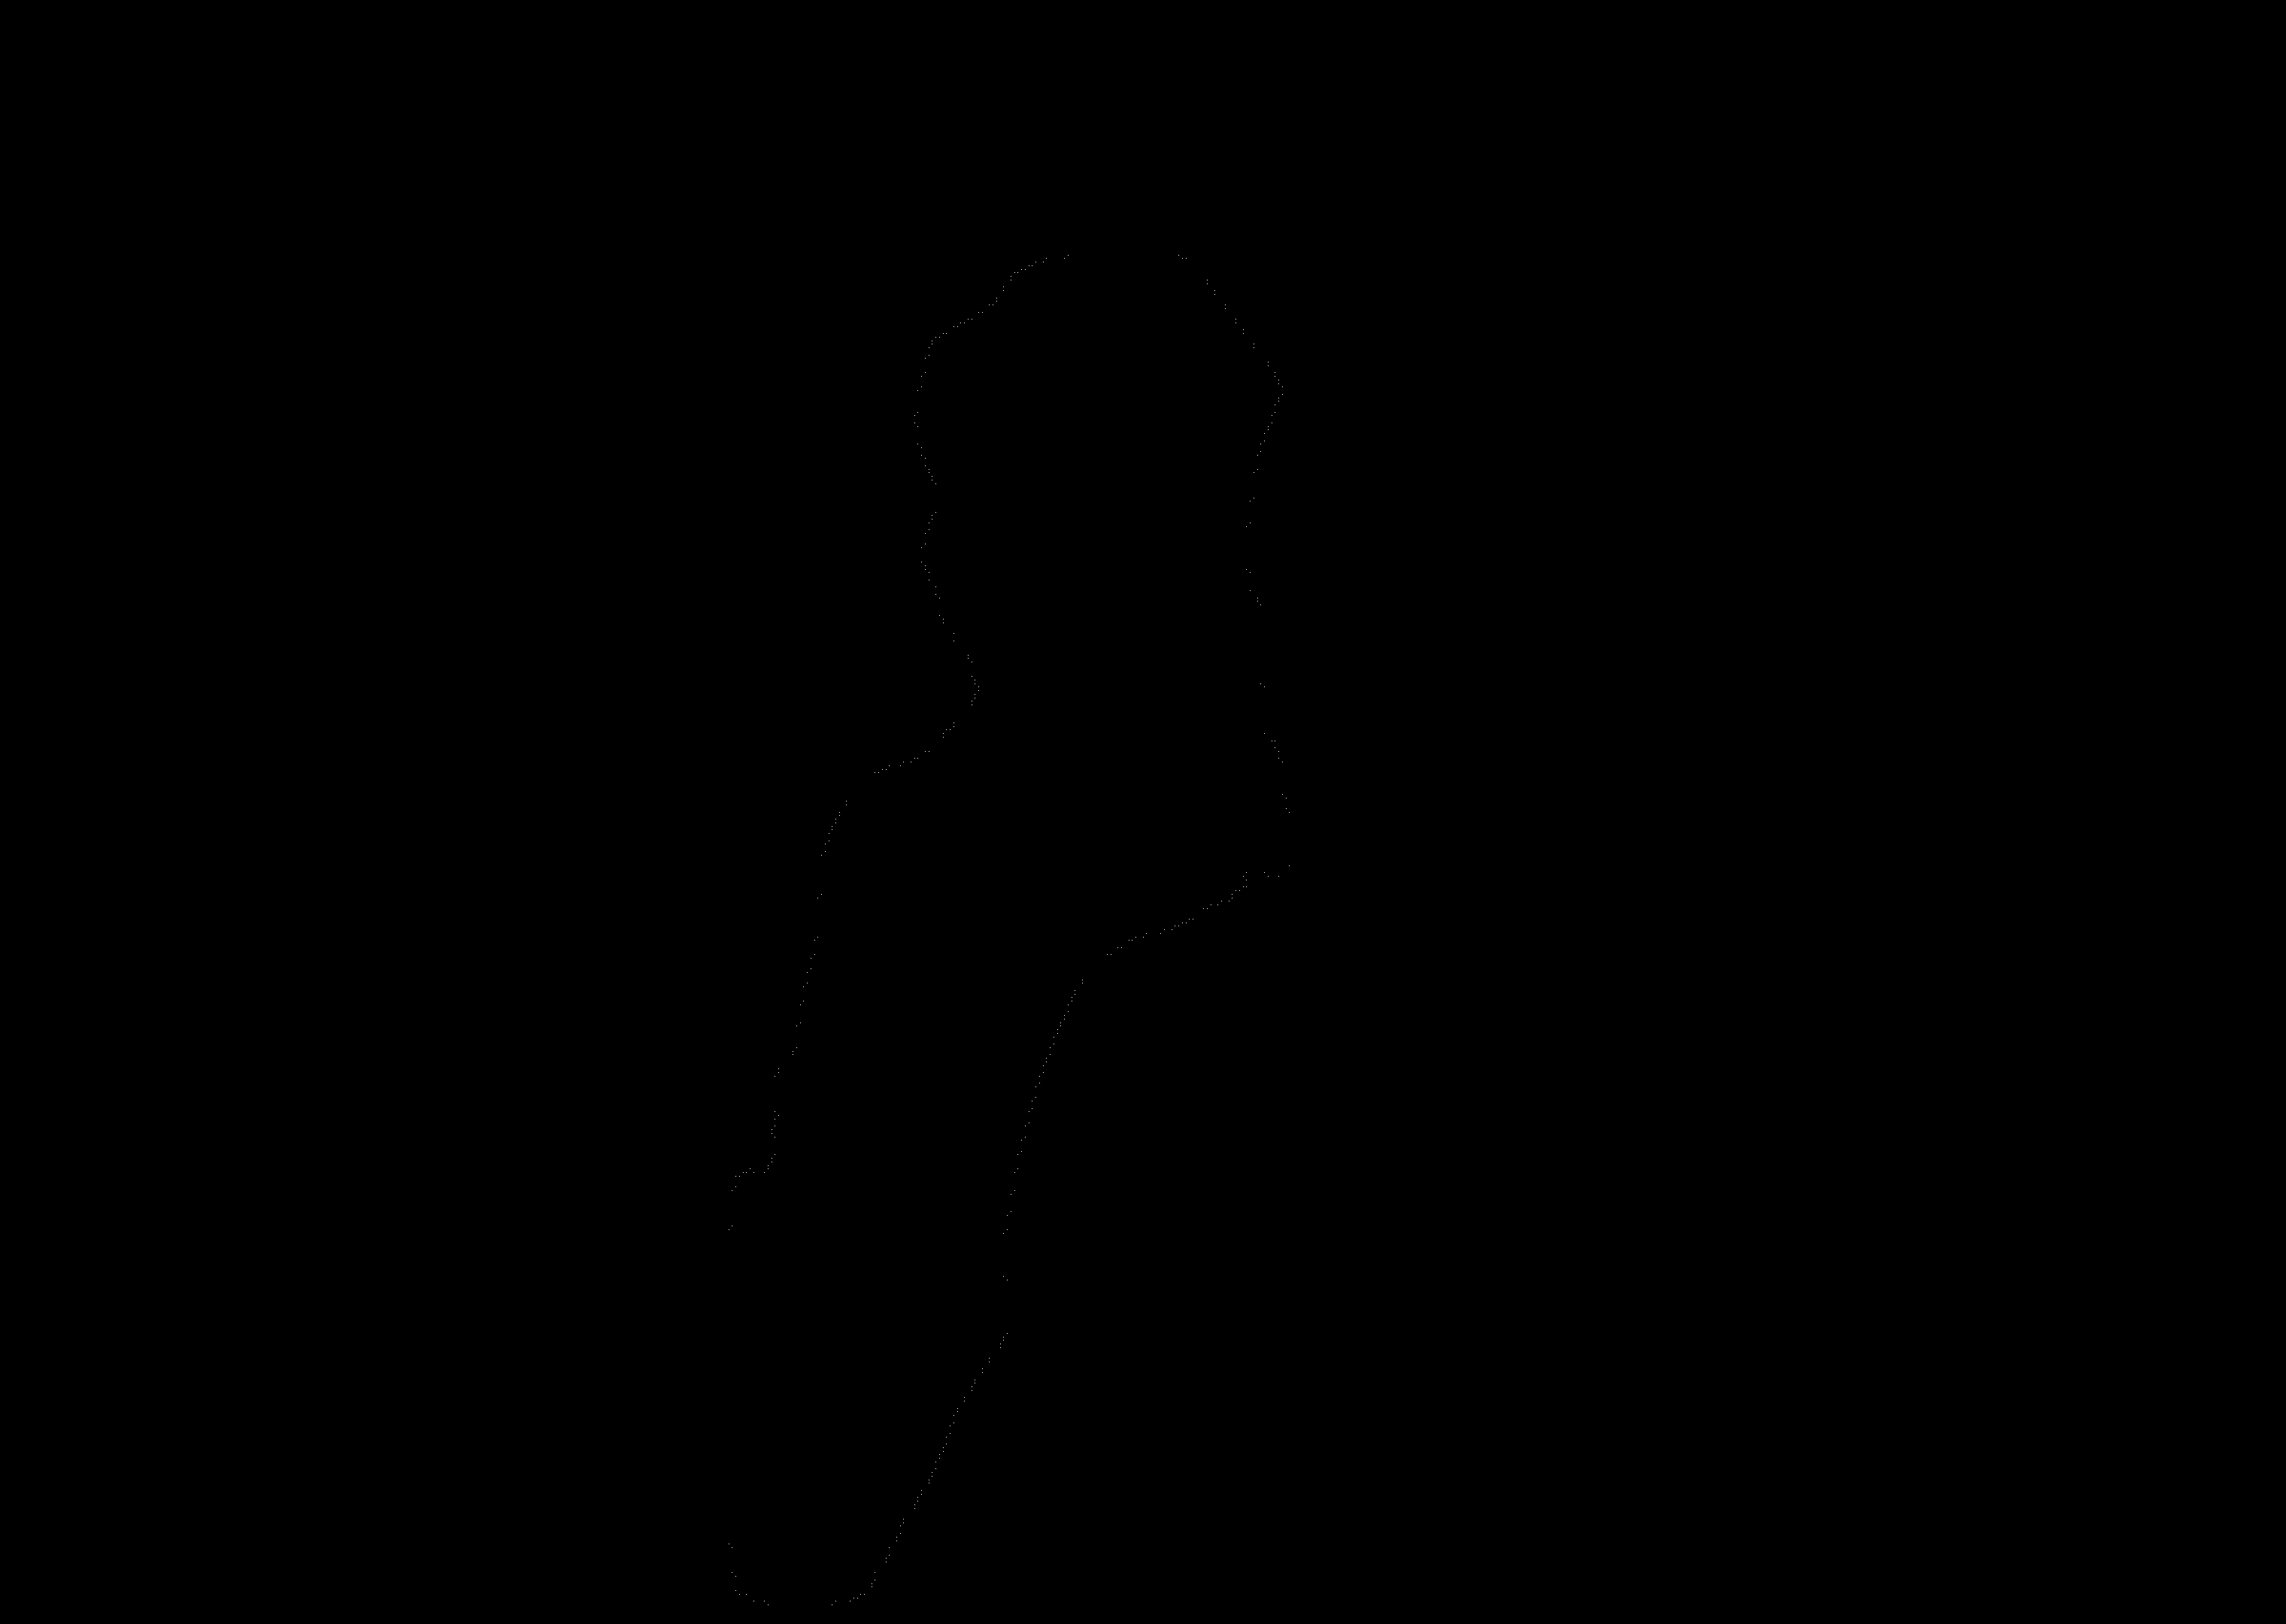

In [ ]:
cv2_imshow(blk.astype("uint8"))

In [ ]:
outs = open("/content/runs/segment/predict/labels/Sample_Image_gaming.txt" , "r").readlines()

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
for dt in outs:
  print(int(dt.split()[0]) , coco_names[int(dt.split()[0])])

0 person
0 person


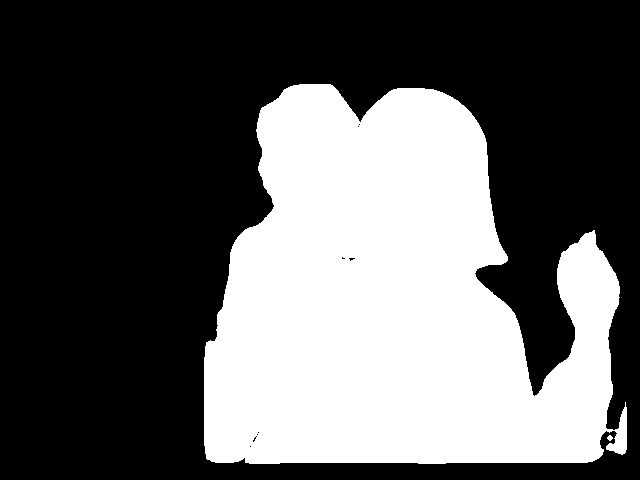

In [ ]:
# predict[0].masks is an instance of the Masks class
# Accessing the first and second masks
mask1 = predict[0].masks.data[0].numpy()
mask2 = predict[0].masks.data[1].numpy()

# Combine the masks using element-wise maximum
combined_mask = np.maximum(mask1, mask2)

# Scale combined mask to uint8 for visualization
combined_mask_scaled = (combined_mask * 255).astype("uint8")

# Display the combined mask
cv2_imshow(combined_mask_scaled)